<a href="https://colab.research.google.com/github/Marziesoltani/humidity-classification/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Data Analysis

/content/drive/My Drive/Data Analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install scikit-plot
import scikitplot as skplt

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#Dataset

In [ ]:
df = pd.read_csv('logistic Reg.csv')
df

,STATION,Longitude,Latitude,Elevation,Jan Minimum Temperature,Feb Minimum Temperature,Mar Minimum Temperature,Oct Minimum Temperature,Nov Minimum Temperature,Dec Minimum Temperature,Minimum Annual Temperature,Jan Days with a minimum temperature of -4 and lower,Feb Days with a minimum temperature of -4 and lower,Dec Days with a minimum temperature of -4 and lower,Annual Days with a minimum temperature of -4 and lower,Jan Freezing Days,Feb Freezing Days,Dec Freezing Days,Annual Freezing Days,Jan Minimum Absolute Temperature,Feb Minimum Absolute Temperature,Mar Minimum Absolute Temperature,Oct Minimum Absolute Temperature,Nov Minimum Absolute Temperature,Dec Minimum Absolute Temperature,Minimum Annual Absolute Temperature,Mar maximum Temperature,Apr maximum Temperature,May maximum Temperature,June maximum Temperature,July maximum Temperature,Auq maximum Temperature,Sep maximum Temperature,Oct maximum Temperature,Maximum Annual Temperature,Apr Maximum Absolute Temperature,May Maximum Absolute Temperature,June Maximum Absolute Temperature,July Maximum Absolute Temperature,Auq Maximum Absolute Temperature,...,Feb Semi-Cloudy Days,Mar Semi-Cloudy Days,Apr Semi-Cloudy Days,May Semi-Cloudy Days,Nov Semi-Cloudy Days,Dec Semi-Cloudy Days,Annual Semi-Cloudy Days,Jan Cloudy Days,Feb Cloudy Days,Mar Cloudy Days,Apr Cloudy Days,Dec Cloudy Days,Annual Cloudy Days,Mar Sunny Hours,Apr Sunny Hours,May Sunny Hours,June Sunny Hours,July Sunny Hours,Aug Sunny Hours,Sept Sunny Hours,Oct Sunny Hours,Annual Sunny Hours,Winter Rainfall,Spring Rainfall,Summer Rainfall,Autumn Rainfall,Winter Days With Rainfall > 10mm,Spring Days With Rainfall > 10mm,Summer Days With Rainfall > 10mm,Autumn Days With Rainfall > 10mm,Winter Days With Rainfall > 5mm,Spring Days With Rainfall > 5mm,Summer Days With Rainfall > 5mm,Autumn Days With Rainfall > 5mm,Winter Days With Rainfall,Spring Days With Rainfall,Summer Days With Rainfall,Autumn Days With Rainfall,Humidity,Temperature
0,ARDEBIL,38.25,48.28,1332.0,-7.800000,-5.800000,-2.000000,5.100000,0.300000,-4.500000,3.000000,21.600000,17.300000,15.300000,71.3,27.9000,24.000000,24.200000,126.700000,-31.4,-33.8,-28.8,-21.0,-24.2,-27.0,-33.8,9.800000,16.6,19.900000,23.400000,25.100000,25.100000,22.700000,17.700000,15.5000,32.0,33.0,37.5,38.0,39.8,...,10.0,11.8,14.4,14.4,10.2,11.4,133.3,7.8,8.4,11.1,9.7,8.2,87.9,170.4,184.9,245.4,293.6,302.8,274.3,227.1,185.6,2478.4,81.5,101.5,21.8,90.7,1.8,2.7,0.5,2.7,5.8,6.8,1.3,5.8,28.4,33.1,14.4,24.8,0,1
1,GERMI,39.05,48.05,749.0,-1.083333,0.550000,4.816667,11.950000,6.216667,2.316667,10.133333,7.166667,5.166667,1.333333,14.0,19.5000,12.833333,10.333333,48.666667,-12.0,-7.4,-4.8,2.6,-2.6,-7.4,-12.0,13.200000,15.4,21.700000,27.700000,29.700000,29.700000,24.000000,18.500000,18.0000,35.0,32.4,34.2,39.2,36.4,...,10.2,15.0,10.5,10.2,7.2,8.8,115.6,9.8,10.5,9.3,12.7,8.0,93.0,163.6,161.4,235.8,290.0,315.9,287.0,201.8,153.2,2380.9,73.8,96.0,55.3,87.9,1.9,2.3,2.1,2.3,5.5,7.2,4.0,6.3,26.3,31.0,14.5,26.5,0,1
2,KHALKHAL,37.63,48.51,1796.0,-9.300000,-7.600000,-3.000000,2.600000,-2.300000,-5.700000,2.000000,23.500000,19.000000,17.500000,86.5,29.4000,25.900000,26.700000,148.700000,-31.5,-27.6,-24.5,-7.6,-20.6,-25.0,-31.5,7.900000,14.3,19.100000,23.600000,25.200000,26.300000,23.200000,17.200000,14.5000,27.6,29.0,34.8,35.4,35.0,...,9.5,11.0,13.6,13.0,10.9,11.9,116.9,10.5,10.2,11.5,9.8,9.2,70.9,179.2,205.4,273.2,332.2,354.1,338.1,299.7,228.6,2781.8,113.2,132.4,24.7,108.3,2.6,3.9,0.5,3.1,7.5,10.2,2.0,7.3,35.7,30.1,7.6,24.6,0,1
3,MESHKINSHAHR,38.38,47.66,1568.5,-3.900000,-2.700000,0.600000,8.500000,2.600000,-1.300000,6.200000,16.700000,10.900000,9.200000,46.2,24.5000,19.700000,18.200000,91.900000,-18.4,-16.0,-12.0,-3.4,-12.0,-15.8,-18.4,9.500000,14.5,19.300000,24.200000,26.200000,26.800000,22.300000,17.500000,15.5000,29.4,30.0,34.0,34.8,37.4,...,9.5,10.9,11.6,12.7,7.4,9.9,114.0,6.8,6.2,9.0,9.9,5.6,75.4,173.2,177.8,232.7,287.1,282.5,278.0,222.3,197.3,2482.4,87.2,151.5,61.0,73.3,2.0,4.6,1.9,2.0,5.8,10.3,3.3,4.7,

#Scikit-Learn_Logistic

In [ ]:
X = df.iloc[: , 1:194].drop('Annual Rainfall', axis=1)
y = df['Humidity']

In [ ]:
X

,Longitude,Latitude,Elevation,Jan Minimum Temperature,Feb Minimum Temperature,Mar Minimum Temperature,Oct Minimum Temperature,Nov Minimum Temperature,Dec Minimum Temperature,Minimum Annual Temperature,Jan Days with a minimum temperature of -4 and lower,Feb Days with a minimum temperature of -4 and lower,Dec Days with a minimum temperature of -4 and lower,Annual Days with a minimum temperature of -4 and lower,Jan Freezing Days,Feb Freezing Days,Dec Freezing Days,Annual Freezing Days,Jan Minimum Absolute Temperature,Feb Minimum Absolute Temperature,Mar Minimum Absolute Temperature,Oct Minimum Absolute Temperature,Nov Minimum Absolute Temperature,Dec Minimum Absolute Temperature,Minimum Annual Absolute Temperature,Mar maximum Temperature,Apr maximum Temperature,May maximum Temperature,June maximum Temperature,July maximum Temperature,Auq maximum Temperature,Sep maximum Temperature,Oct maximum Temperature,Maximum Annual Temperature,Apr Maximum Absolute Temperature,May Maximum Absolute Temperature,June Maximum Absolute Temperature,July Maximum Absolute Temperature,Auq Maximum Absolute Temperature,Sep Maximum Absolute Temperature,...,Annual Average Wind Speed,Jan Semi-Cloudy Days,Feb Semi-Cloudy Days,Mar Semi-Cloudy Days,Apr Semi-Cloudy Days,May Semi-Cloudy Days,Nov Semi-Cloudy Days,Dec Semi-Cloudy Days,Annual Semi-Cloudy Days,Jan Cloudy Days,Feb Cloudy Days,Mar Cloudy Days,Apr Cloudy Days,Dec Cloudy Days,Annual Cloudy Days,Mar Sunny Hours,Apr Sunny Hours,May Sunny Hours,June Sunny Hours,July Sunny Hours,Aug Sunny Hours,Sept Sunny Hours,Oct Sunny Hours,Annual Sunny Hours,Winter Rainfall,Spring Rainfall,Summer Rainfall,Autumn Rainfall,Winter Days With Rainfall > 10mm,Spring Days With Rainfall > 10mm,Summer Days With Rainfall > 10mm,Autumn Days With Rainfall > 10mm,Winter Days With Rainfall > 5mm,Spring Days With Rainfall > 5mm,Summer Days With Rainfall > 5mm,Autumn Days With Rainfall > 5mm,Winter Days With Rainfall,Spring Days With Rainfall,Summer Days With Rainfall,Autumn Days With Rainfall
0,38.25,48.28,1332.0,-7.800000,-5.800000,-2.000000,5.100000,0.300000,-4.500000,3.000000,21.600000,17.300000,15.300000,71.3,27.9000,24.000000,24.200000,126.700000,-31.4,-33.8,-28.8,-21.0,-24.2,-27.0,-33.8,9.800000,16.6,19.900000,23.400000,25.100000,25.100000,22.700000,17.700000,15.5000,32.0,33.0,37.5,38.0,39.8,37.4,...,7.4,11.2,10.0,11.8,14.4,14.4,10.2,11.4,133.3,7.8,8.4,11.1,9.7,8.2,87.9,170.4,184.9,245.4,293.6,302.8,274.3,227.1,185.6,2478.4,81.5,101.5,21.8,90.7,1.8,2.7,0.5,2.7,5.8,6.8,1.3,5.8,28.4,33.1,14.4,24.8
1,39.05,48.05,749.0,-1.083333,0.550000,4.816667,11.950000,6.216667,2.316667,10.133333,7.166667,5.166667,1.333333,14.0,19.5000,12.833333,10.333333,48.666667,-12.0,-7.4,-4.8,2.6,-2.6,-7.4,-12.0,13.200000,15.4,21.700000,27.700000,29.700000,29.700000,24.000000,18.500000,18.0000,35.0,32.4,34.2,39.2,36.4,36.8,...,7.4,10.3,10.2,15.0,10.5,10.2,7.2,8.8,115.6,9.8,10.5,9.3,12.7,8.0,93.0,163.6,161.4,235.8,290.0,315.9,287.0,201.8,153.2,2380.9,73.8,96.0,55.3,87.9,1.9,2.3,2.1,2.3,5.5,7.2,4.0,6.3,26.3,31.0,14.5,26.5
2,37.63,48.51,1796.0,-9.300000,-7.600000,-3.000000,2.600000,-2.300000,-5.700000,2.000000,23.500000,19.000000,17.500000,86.5,29.4000,25.900000,26.700000,148.700000,-31.5,-27.6,-24.5,-7.6,-20.6,-25.0,-31.5,7.900000,14.3,19.100000,23.600000,25.200000,26.300000,23.200000,17.200000,14.5000,27.6,29.0,34.8,35.4,35.0,33.6,...,4.5,11.2,9.5,11.0,13.6,13.0,10.9,11.9,116.9,10.5,10.2,11.5,9.8,9.2,70.9,179.2,205.4,273.2,332.2,354.1,338.1,299.7,228.6,2781.8,113.2,132.4,24.7,108.3,2.6,3.9,0.5,3.1,7.5,10.2,2.0,7.3,35.7,30.1,7.6,24.6
3,38.38,47.66,1568.5,-3.900000,-2.700000,0.600000,8.500000,2.600000,-1.300000,6.200000,16.700000,10.900000,9.200000,46.2,24.5000,19.700000,18.200000,91.900000,-18.4,-16.0,-12.0,-3.4,-12.0,-15.8,-18.4,9.500000,14.5,19.300000,24.200000,26.200000,26.800000,22.300000,17.500000,15.5000,29.4,30.0,34.0,34.8,37.4,34.2,...,4.4,9.6,9.5,10.9,11.6,12.7,7.4,9.9,114.0,6.8,6.2,9.0,9.9,5.6,75.4,173.2,177.8,232.7,287.1,282.5,278.0,222.3,197.3,248

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
logmodel = LogisticRegression(solver='saga')

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.92      0.96      0.94        24

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [ ]:
confusion_matrix(y_test, predictions)

array([[24,  2],
       [ 1, 23]])

#StatsModels_Logistic

In [ ]:
df2 = pd.read_csv('Factor Analysis_logistic.csv')
df2

,STATION,Longitude,Latitude,Elevation,F1,F2,F3,F4,F5,F6,F7,F8,F9,Humidity,Temperature
0,ARDEBIL,38.25,48.28,1332.0,-1.62872,0.36714,-1.06393,1.98172,0.89729,-0.42290,0.75378,0.30787,-0.19824,0,1
1,GERMI,39.05,48.05,749.0,-0.22803,1.12114,-0.84243,1.05242,1.23708,0.03371,0.59009,-1.22184,0.07608,0,1
2,KHALKHAL,37.63,48.51,1796.0,-1.83758,-0.01092,-0.48719,1.45302,-0.44013,-0.22609,0.31651,0.26486,0.57474,0,1
3,MESHKINSHAHR,38.38,47.66,1568.5,-1.14692,1.11557,-1.07704,0.97618,-0.25957,-0.83849,-1.23474,-0.50679,2.52775,0,1
4,PARSABAD MOGHAN,39.65,47.91,31.9,-0.11963,0.72306,-1.23986,1.90412,-0.81661,-0.47116,0.76892,-0.78226,0.02675,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,MARVAST,30.50,54.25,1546.6,-0.16982,0.09462,-0.87674,-1.21124,0.78925,-0.97559,-0.45707,-0.67034,-0.59772,1,0
160,ROBAT POSHTBADAM,33.03,55.55,1188.0,0.27656,0.03614,-0.59142,-1.38047,0.52295,-0.42313,0.27766,-1.25294,-0.40042,1,0
161,TABASS,33.60,56.91,711.0,0.64910,-0.06574,-1.02410,-0.92230,-1.32101,-0.11425,0.42271,0.67349,-0.19263,1,0
162,YAZD,31.90,54.28,1237.2,-0.03139,0.35911,-1.17064,-1.14254,-0.19749,-0.76775,0.33526,1.12612,-0.45743,1,0


In [ ]:
X1 = df2.iloc[: , 5:13].drop('F8', axis=1)
y1 = df2['Humidity']

In [ ]:
X1

,F2,F3,F4,F5,F6,F7,F9
0,0.36714,-1.06393,1.98172,0.89729,-0.42290,0.75378,-0.19824
1,1.12114,-0.84243,1.05242,1.23708,0.03371,0.59009,0.07608
2,-0.01092,-0.48719,1.45302,-0.44013,-0.22609,0.31651,0.57474
3,1.11557,-1.07704,0.97618,-0.25957,-0.83849,-1.23474,2.52775
4,0.72306,-1.23986,1.90412,-0.81661,-0.47116,0.76892,0.02675
...,...,...,...,...,...,...,...
159,0.09462,-0.87674,-1.21124,0.78925,-0.97559,-0.45707,-0.59772
160,0.03614,-0.59142,-1.38047,0.52295,-0.42313,0.27766,-0.40042
161,-0.06574,-1.02410,-0.92230,-1.32101,-0.11425,0.42271,-0.19263
162,0.35911,-1.17064,-1.14254,-0.19749,-0.76775,0.33526,-0.45743


In [ ]:
logit_mod = sm.Logit(y1, X1)

In [ ]:
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.254764
         Iterations 9


In [ ]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:               Humidity   No. Observations:                  164
Model:                          Logit   Df Residuals:                      157
Method:                           MLE   Df Model:                            6
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                  0.6315
Time:                        17:43:15   Log-Likelihood:                -41.781
converged:                       True   LL-Null:                       -113.37
Covariance Type:            nonrobust   LLR p-value:                 2.137e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
F2            -2.9125      0.816     -3.568      0.000      -4.512      -1.313
F3            -4.9740      0.999     -4.981      0.000      -6.931      -3.017
F4            -2.2505      0.542     -4.154      0.0

#FA Logistic


In [ ]:
X_fa_train, X_fa_test, y_fa_train, y_fa_test = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [ ]:
logmodel_fa = LogisticRegression()

In [ ]:
logmodel_fa.fit(X_fa_train,y_fa_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions_fa = logmodel_fa.predict(X_fa_test)

In [ ]:
print(classification_report(y_fa_test, predictions_fa))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.92      0.96      0.94        24

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [ ]:
confusion_matrix(y_fa_test, predictions_fa)

array([[24,  2],
       [ 1, 23]])

In [ ]:
proba = logmodel_fa.predict_proba(X_fa_test)

In [ ]:
proba = proba[:, 1]

In [ ]:
auc_fa = roc_auc_score(y_test, proba)
print('AUC: %.2f' % auc_fa)

AUC: 1.00


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, proba)

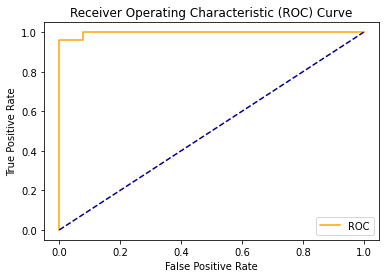

In [ ]:
plot_roc_curve(fpr, tpr)

#KNN

In [ ]:
df3 = pd.read_csv('Factor Analysis_New.csv')
df3

,STATION,Longitude,Latitude,Elevation,F1,F2,F3,F4,F5,F6,F7,F8,F9,Rain
0,ARDEBIL,38.25,48.28,1332.0,-1.62872,0.36714,-1.06393,1.98172,0.89729,-0.42290,0.75378,0.30787,-0.19824,Semi Humid
1,GERMI,39.05,48.05,749.0,-0.22803,1.12114,-0.84243,1.05242,1.23708,0.03371,0.59009,-1.22184,0.07608,Semi Humid
2,KHALKHAL,37.63,48.51,1796.0,-1.83758,-0.01092,-0.48719,1.45302,-0.44013,-0.22609,0.31651,0.26486,0.57474,Semi Humid
3,MESHKINSHAHR,38.38,47.66,1568.5,-1.14692,1.11557,-1.07704,0.97618,-0.25957,-0.83849,-1.23474,-0.50679,2.52775,Semi Humid
4,PARSABAD MOGHAN,39.65,47.91,31.9,-0.11963,0.72306,-1.23986,1.90412,-0.81661,-0.47116,0.76892,-0.78226,0.02675,Semi Humid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,MARVAST,30.50,54.25,1546.6,-0.16982,0.09462,-0.87674,-1.21124,0.78925,-0.97559,-0.45707,-0.67034,-0.59772,Dry
160,ROBAT POSHTBADAM,33.03,55.55,1188.0,0.27656,0.03614,-0.59142,-1.38047,0.52295,-0.42313,0.27766,-1.25294,-0.40042,Dry
161,TABASS,33.60,56.91,711.0,0.64910,-0.06574,-1.02410,-0.92230,-1.32101,-0.11425,0.42271,0.67349,-0.19263,Dry
162,YAZD,31.90,54.28,1237.2,-0.03139,0.35911,-1.17064,-1.14254,-0.19749,-0.76775,0.33526,1.12612,-0.45743,Dry


In [ ]:
X2 = df3.iloc[: , 5:13].drop('F8', axis=1)
y2 = df3['Rain']

In [ ]:
X2

,F2,F3,F4,F5,F6,F7,F9
0,0.36714,-1.06393,1.98172,0.89729,-0.42290,0.75378,-0.19824
1,1.12114,-0.84243,1.05242,1.23708,0.03371,0.59009,0.07608
2,-0.01092,-0.48719,1.45302,-0.44013,-0.22609,0.31651,0.57474
3,1.11557,-1.07704,0.97618,-0.25957,-0.83849,-1.23474,2.52775
4,0.72306,-1.23986,1.90412,-0.81661,-0.47116,0.76892,0.02675
...,...,...,...,...,...,...,...
159,0.09462,-0.87674,-1.21124,0.78925,-0.97559,-0.45707,-0.59772
160,0.03614,-0.59142,-1.38047,0.52295,-0.42313,0.27766,-0.40042
161,-0.06574,-1.02410,-0.92230,-1.32101,-0.11425,0.42271,-0.19263
162,0.35911,-1.17064,-1.14254,-0.19749,-0.76775,0.33526,-0.45743


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=101)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.88      0.96      0.92        24

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

[[24  2]
 [ 1 23]]


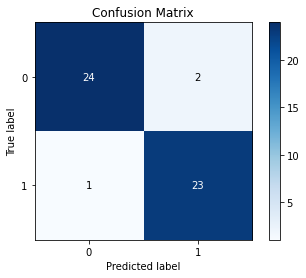

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False)
plt.show()

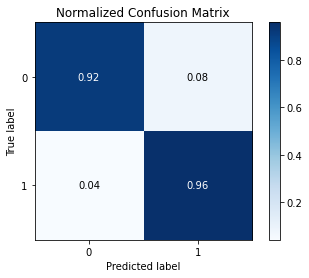

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

In [ ]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

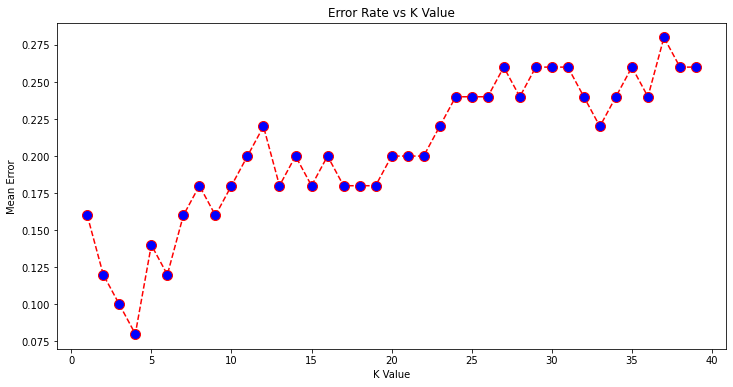

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.savefig('K.png', dpi=520, format='png', bbox_inches='tight')
plt.show()

#LDA

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_pred = lda.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,lda_pred))
print(classification_report(y_test, lda_pred))

[[21  5]
 [ 3 21]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.81      0.88      0.84        24

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



In [ ]:
probs_lda = lda.predict_proba(X_test)

In [ ]:
probs_lda = probs_lda[:, 1]

In [ ]:
auc_lda = roc_auc_score(y_test, probs_lda)
print('AUC: %.2f' % auc_lda)

AUC: 0.91


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs_lda)

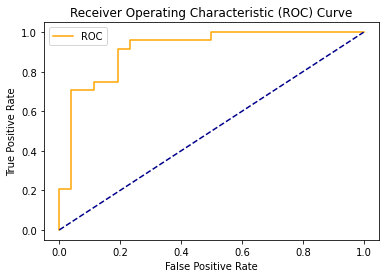

In [ ]:
plot_roc_curve(fpr, tpr)

#Decision Tree Analysis

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
clf = dtree.fit(X_train, y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))


[[23  3]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.89      1.00      0.94        24

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



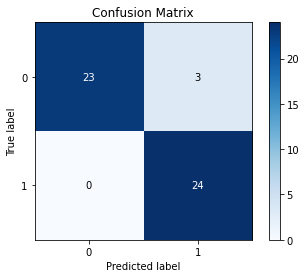

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False)
plt.show()

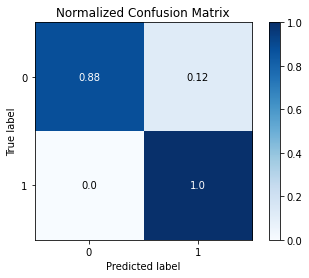

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

In [ ]:
features = list(X.columns[:])

In [ ]:
dot_data = StringIO()

In [ ]:
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

In [ ]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

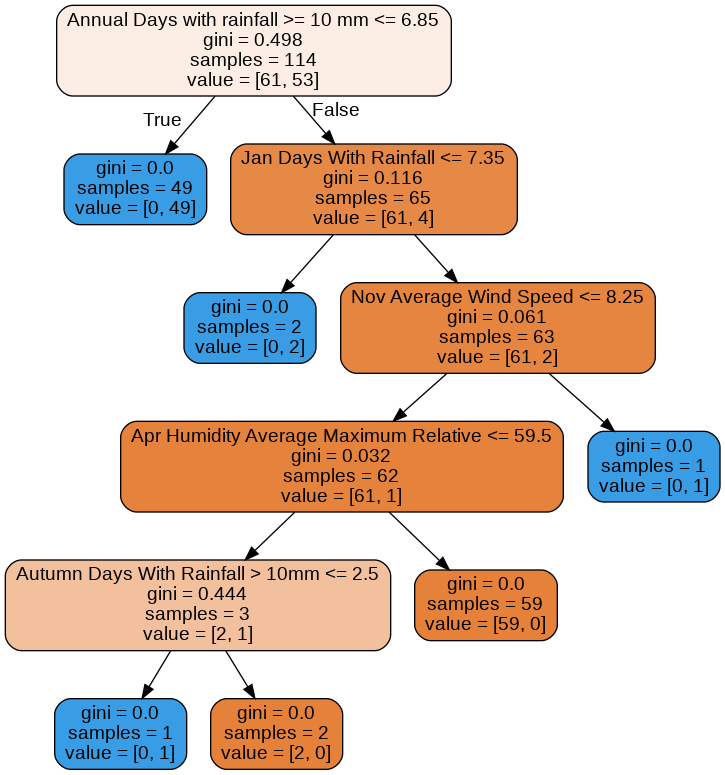

In [ ]:
Image(graph[0].create_png())

In [ ]:
probs_dtree = dtree.predict_proba(X_test)

In [ ]:
probs_dtree = probs_dtree[:, 1]

In [ ]:
auc_dtree = roc_auc_score(y_test, probs_dtree)
print('AUC: %.2f' % auc_dtree)

AUC: 0.94


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs_dtree)

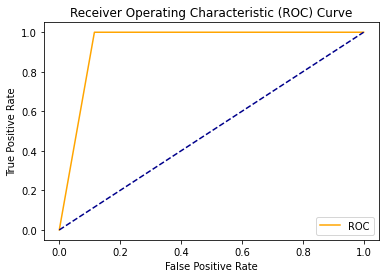

In [ ]:
plot_roc_curve(fpr, tpr)

#Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test, rfc_pred))

[[25  1]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.96      1.00      0.98        24

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



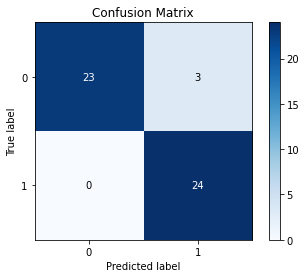

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False)
plt.show()

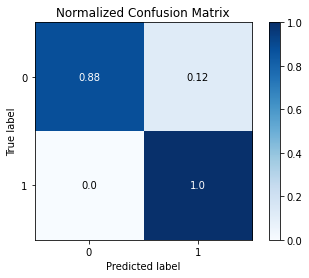

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

In [ ]:
probs = rfc.predict_proba(X_test)

In [ ]:
probs = probs[:, 1]

In [ ]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 1.00


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

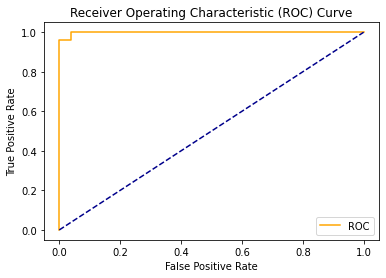

In [ ]:
plot_roc_curve(fpr, tpr)

#َALL(X)

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [KNeighborsClassifier(n_neighbors=5),
               LinearDiscriminantAnalysis(), 
               DecisionTreeClassifier(random_state=101),
               RandomForestClassifier(random_state=101)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

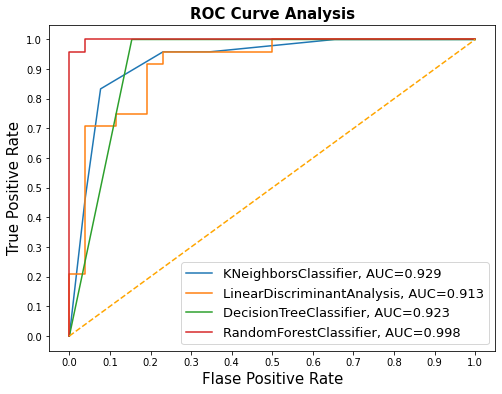

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('ROC ALL.png', dpi=520, format='png', bbox_inches='tight')
plt.show()

<Figure size 1080x720 with 0 Axes>

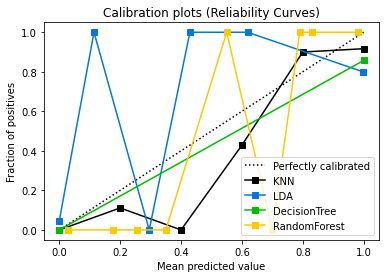

In [ ]:
import scikitplot as skplt
knn = KNeighborsClassifier(n_neighbors=5)
lda = LinearDiscriminantAnalysis()
dt = DecisionTreeClassifier(random_state=101)
rf = RandomForestClassifier(random_state=101)
knn_probas = knn.fit(X_train, y_train).predict_proba(X_test)
lda_probas = lda.fit(X_train, y_train).predict_proba(X_test)
dt_probas = dt.fit(X_train, y_train).predict_proba(X_test)
rf_probas = rf.fit(X_train, y_train).predict_proba(X_test)
probas_list = [knn_probas, lda_probas, dt_probas, rf_probas]
clf_names = ['KNN', 'LDA', 'DecisionTree', 'RandomForest']
plt.figure(figsize=(15,10))
skplt.metrics.plot_calibration_curve(y_test, probas_list,clf_names)
plt.savefig('calibration plot.png', dpi=520, format='png', bbox_inches='tight')
plt.show()